In [1]:
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from neuralnetwork import NeuralNetwork

In [ ]:
# Run only if you need to install nltk.corpus and nltk.stem
nltk.download()

In [2]:
# Read the data set and parse independent lines
fd = open("Assignment_2_data.txt","r")
file_data = fd.read()
lines = (file_data).splitlines()

In [3]:
# Create Necessary objects
ps = PorterStemmer()
y_target_names = []
x = []
stop_words = set(stopwords.words('english'))
unique_tokens = set()

In [4]:
# Pasing input file into labels and features 
for i in range(len(lines)): 
    # Splitting based on white space and non alpha numberic characters
    words_tokens = re.split('\W+',lines[i])
    words_tokens = list(filter(lambda temp: (temp != '' ),words_tokens)) 
    
    # Removing stop word from the data
    filtered_sentence = []
    for w in words_tokens:
        if w not in stop_words:
        # Applying porter stemmer
            stemmed_word = ps.stem(w).lower()
            filtered_sentence.append(stemmed_word)


    # Store pre processed data in x and y_target_names
    y_target_names.append(filtered_sentence[0])
    x.append(filtered_sentence[1:])
    unique_tokens.update(filtered_sentence[1:])

In [5]:
# Declare variables for one hot encoding
N = len(x)
unique_tokens = list(unique_tokens)
encoding_length = (len(unique_tokens))
x_encoded = np.zeros( ( N , encoding_length) )


In [6]:
# Binary encoding of features and labels
for i in range(N):
    for j in x[i]:
        ind = unique_tokens.index(j)
        x_encoded[i][ind] = 1;
        
y_target = np.zeros((N,1))
for i in range(len(y_target_names)):
    if(y_target_names[i] == "ham"):
        y_target[i] = 1

In [7]:
# Split training and test error
trainN = int(0.8*N)

X_train = x_encoded[0:trainN]
y_train = y_target[0:trainN]

X_test = x_encoded[trainN:]
y_test = y_target[trainN:]

In [8]:
N,M = X_train.shape

In [9]:
# Using tanh activation function
nn = NeuralNetwork(M,np.array([100,50]),1)

In [10]:
nn.train(X_train,y_train,X_test,y_test,epochs=100,learning_rate=1e-1,learning_rate_decay=0.98)

-----------Ratio of Correct predictions over testset(279/1115)-----------
-----------Ratio of Correct predictions over training set(1108/4459)-----------
Epoch (1/100) Training Error : 0.475902
Epoch (2/100) Training Error : 0.439462
Epoch (3/100) Training Error : 0.406386
Epoch (4/100) Training Error : 0.367215
Epoch (5/100) Training Error : 0.323797
Epoch (6/100) Training Error : 0.280511
Epoch (7/100) Training Error : 0.241434
Epoch (8/100) Training Error : 0.208524
Epoch (9/100) Training Error : 0.181831
Epoch (10/100) Training Error : 0.160480
Epoch (11/100) Training Error : 0.143376
Epoch (12/100) Training Error : 0.129532
Epoch (13/100) Training Error : 0.118168
Epoch (14/100) Training Error : 0.108702
Epoch (15/100) Training Error : 0.100696
Epoch (16/100) Training Error : 0.093814
Epoch (17/100) Training Error : 0.087797
Epoch (18/100) Training Error : 0.082451
Epoch (19/100) Training Error : 0.077639
Epoch (20/100) Training Error : 0.073274
Epoch (21/100) Training Error : 0.0

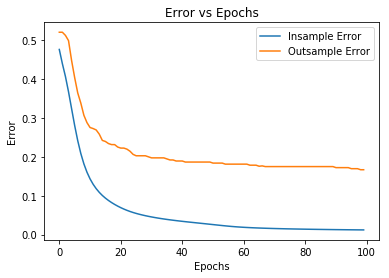

In [11]:
nn.plot()

In [12]:
nn2 = NeuralNetwork(M,np.array([100,50]),2)

In [13]:
nn2.train(X_train,y_train,X_test,y_test,epochs=100,learning_rate=1.5e-1,learning_rate_decay=0.98,method="two")

-----------Ratio of Correct predictions over testset(179/1115)-----------
-----------Ratio of Correct predictions over training set(682/4459)-----------
Epoch (1/100) Training Error : 0.525642
Epoch (2/100) Training Error : 0.493716
Epoch (3/100) Training Error : 0.473992
Epoch (4/100) Training Error : 0.455799
Epoch (5/100) Training Error : 0.435779
Epoch (6/100) Training Error : 0.413131
Epoch (7/100) Training Error : 0.388501
Epoch (8/100) Training Error : 0.363467
Epoch (9/100) Training Error : 0.339781
Epoch (10/100) Training Error : 0.318674
Epoch (11/100) Training Error : 0.300633
Epoch (12/100) Training Error : 0.285577
Epoch (13/100) Training Error : 0.273135
Epoch (14/100) Training Error : 0.262853
Epoch (15/100) Training Error : 0.254301
Epoch (16/100) Training Error : 0.247114
Epoch (17/100) Training Error : 0.240994
Epoch (18/100) Training Error : 0.235712
Epoch (19/100) Training Error : 0.231088
Epoch (20/100) Training Error : 0.226985
Epoch (21/100) Training Error : 0.22

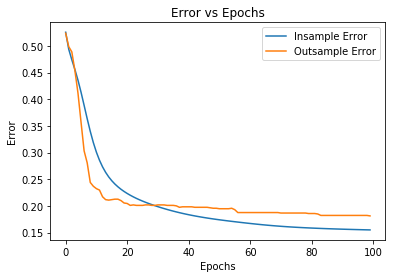

In [14]:
nn2.plot()

In [15]:
# Using sigmoid activation function
nn = NeuralNetwork(M,np.array([100,50]),1,activation_function="sigmoid",weight_scale=1)

In [ ]:
nn.train(X_train,y_train,X_test,y_test,epochs=500,learning_rate=1e-1,learning_rate_decay=0.98)

-----------Ratio of Correct predictions over testset(436/1115)-----------
-----------Ratio of Correct predictions over training set(1765/4459)-----------
Epoch (1/500) Training Error : 0.524950
Epoch (2/500) Training Error : 0.497326
Epoch (3/500) Training Error : 0.488711
Epoch (4/500) Training Error : 0.485092
Epoch (5/500) Training Error : 0.482826
Epoch (6/500) Training Error : 0.480899
Epoch (7/500) Training Error : 0.479012
Epoch (8/500) Training Error : 0.477087
Epoch (9/500) Training Error : 0.475112
Epoch (10/500) Training Error : 0.473097
Epoch (11/500) Training Error : 0.471055
Epoch (12/500) Training Error : 0.469000
Epoch (13/500) Training Error : 0.466940
Epoch (14/500) Training Error : 0.464884
Epoch (15/500) Training Error : 0.462836
Epoch (16/500) Training Error : 0.460801
Epoch (17/500) Training Error : 0.458782
Epoch (18/500) Training Error : 0.456780
Epoch (19/500) Training Error : 0.454797
Epoch (20/500) Training Error : 0.452834
Epoch (21/500) Training Error : 0.4

Epoch (173/500) Training Error : 0.310117
Epoch (174/500) Training Error : 0.309668
Epoch (175/500) Training Error : 0.309225
-----------Ratio of Correct predictions over testset(875/1115)-----------
-----------Ratio of Correct predictions over training set(3519/4459)-----------
Epoch (176/500) Training Error : 0.308789
Epoch (177/500) Training Error : 0.308356
Epoch (178/500) Training Error : 0.307926
Epoch (179/500) Training Error : 0.307498
Epoch (180/500) Training Error : 0.307073
Epoch (181/500) Training Error : 0.306650
Epoch (182/500) Training Error : 0.306230
Epoch (183/500) Training Error : 0.305813
Epoch (184/500) Training Error : 0.305397
Epoch (185/500) Training Error : 0.304985
Epoch (186/500) Training Error : 0.304574
Epoch (187/500) Training Error : 0.304166
Epoch (188/500) Training Error : 0.303761
Epoch (189/500) Training Error : 0.303358
Epoch (190/500) Training Error : 0.302957
Epoch (191/500) Training Error : 0.302558
Epoch (192/500) Training Error : 0.302162
Epoch 

In [ ]:
nn.plot()

In [ ]:
nn2 = NeuralNetwork(M,np.array([100,50]),2,activation_function="sigmoid",weight_scale=1)

In [ ]:
nn2.train(X_train,y_train,X_test,y_test,epochs=500,learning_rate=1e-1,learning_rate_decay=0.98,method="two")

In [ ]:
nn2.plot()